# Introduction


En 1900, Louis Bachelier [[1]](https://doi.org/10.24033/asens.476) a proposé un modèle de modélisation des cours sous-jacents en utilisant des trajectoires aléatoires. Son modèle, basé sur le mouvement brownien, permet de capturer l'aspect imprévisible des cours des actifs financiers. Cependant, il présente l'inconvénient de générer des prix négatifs. Pour remédier à ce problème, en 1965, Samuelson [[2]](https://doi.org/10.3386/w24575) a introduit le concept d'exponentielle du mouvement brownien, également connu sous le nom de mouvement brownien géométrique.

Le mouvement brownien géométrique est un processus à trajectoires continues qui confère aux cours la propriété d'avoir des rendements gaussiens, indépendants et stationnaires. Ce modèle est particulièrement intéressant car il est économique en termes de paramètres, dépendant uniquement de deux variables : la tendance $\mu$, qui correspond au rendement (annualisé) du titre espéré par unité de temps, et la volatilité $\sigma$, qui quantifie la variabilité du titre.


## Dynamique des actifs
Le modèle de marché comprend deux actifs sous-jacents.

- L'actif **sans risque** (compte du marché monétaire), décrit par une fonction déterministe
\begin{equation}
dA(t) = rA(t)dt
\end{equation}
avec $ A(0) = 1 $ (pour plus de commodité), où $ r > 0 $ est le taux sans risque.
Il s'agit d'une équation différentielle ordinaire $A'(t) = rA(t)$, mais pour être cohérent avec les prix des actions, qui sont supposés être des processus d'Ito, nous utilisons une notation différentielle. L'équation a une solution unique :
$A(t) = \exp(rt)$

- L'actif **risqué**, considéré comme une action, donne par le modèle de Black-Scholes-Samuelson est représenté par un processus d'Ito de la forme :
\begin{equation}
\frac{dS_t}{S_t} = \mu dt + \sigma dB_t
\end{equation}
où $(B_t)_t$ est un mouvement brownien standard sous $\mathbb{P}$. Sous une forme intégrée, cela devient :
\begin{equation}
S_t = S_0 \cdot e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma B_t}
\end{equation}
Il s'agit d'un modèle de type **log-normal** avec $S_0$ étant donné, où nous appelons $μ ∈ \mathbb{R}$ la dérive et $σ > 0$ la volatilité du prix de l'action $S$.

### Paramètres du modèle
Pour comprendre le rôle des paramètres $μ$, $σ$ dans ce modèle, nous calculons l'espérance de $S_t$.

\begin{equation}
E(S_t) = S_0 E(e^{μt - \frac{1}{2}σ^2 t + σB_t})

= S_0 e^{μt - \frac{1}{2}σ^2 t}E(e^{σB_t})

= S_0 e^{μt}
\end{equation}
Clairement, si $μ = 0$, alors l'espérance de $S_t$ est constante dans le temps.

L'expression pour $E(S_t)$ donne $μ$ comme le rendement logarithmique du prix attendu :
\begin{equation}
μ = \frac{1}{t}ln\frac{E(S_t)}{S_0 }
\end{equation}

Une question naturelle se pose: Comment trouver ces paramètres à partir de certaines anciennes valeurs du prix de l'action? La dernière équation suggère de prendre les prix moyens comme approximation du prix attendu, mais selon la théorie statistique, cette méthode présente une précision insuffisante.


Une approche bien plus efficace consiste à utiliser l'approximation de la volatilité fournie, par exemple, par le schéma suivant. Considérons le processus
\begin{equation}
\ln S_t = \ln S_0 + \left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma B_t,
\end{equation}
qui est un processus d'Ito avec des caractéristiques constantes. Sa variation quadratique $<\ln S_t>_t= \sigma^2t$ et pour une partition de l'intervalle $[0, t]$ donnée par $0 = t_1 < \dots < t_n = t$, avec une petite maille maximale $|\Delta t_k|$, nous avons
\begin{equation}
\sum_k (\ln S(t_{k+1}) - \ln S(t_k))^2 \approx \sigma^2t.
\end{equation}
Ainsi, si les instants $t_k$ représentent des instants passés auxquels nous connaissons les prix, nous pouvons prendre
\begin{equation}
\sigma = \sqrt{\frac{1}{t}\sum_k \ln\frac{S(t_{k+1})}{S(t_k)}}
\end{equation}
comme notre estimation du coefficient de volatilité, un nombre positif appelé la volatilité d'échantillon.

### Implementation in Python 

#### Données de sous-jacentes réelles

In [177]:
import pandas as pd
import numpy as np
import yfinance as yf
from itertools import chain
from scipy.stats import norm
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, Math


<Axes: title={'center': 'Prix de AMD'}, xlabel='Date'>

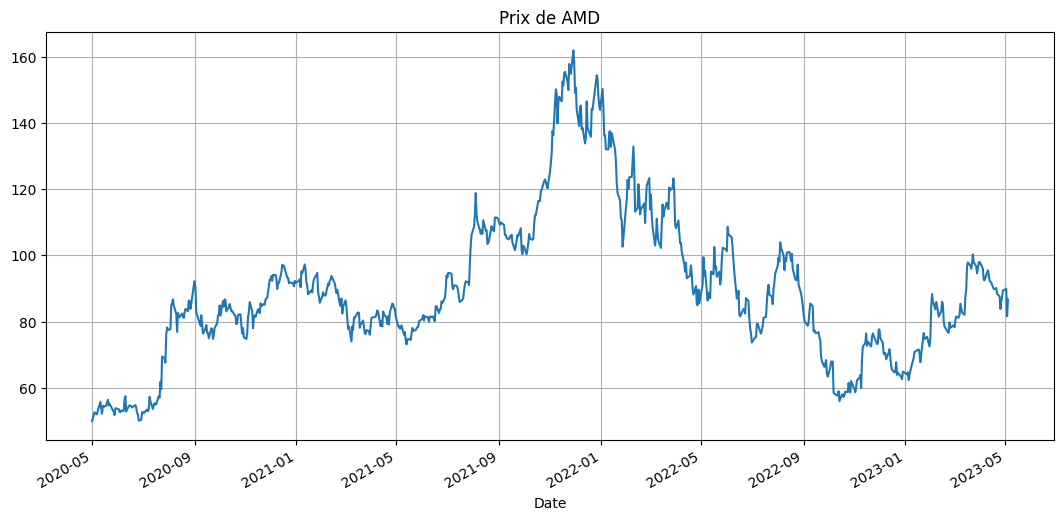

In [178]:



dt=1
sTicker = "AMD"
stock = yf.Ticker(sTicker)
S=stock.history(start='2020-05-01', interval=f"{dt}d")['Close'].rename(sTicker)
t_=S.shape[0]
S.plot(figsize=(13, 6),grid=True,title=f'Prix de {sTicker}')

In [179]:
mu=1/t_ * S.mean()/S[0]
sigma=np.sqrt(1/t_ * (np.log(S.pct_change()+1).sum()) )

In [180]:

print(f"Estimation des parametre Pour l'action {sTicker.upper()}:")
display(Math(r'\hat{\mu}='+f'{mu:.2}'+r'\\ \hat{\sigma}='+f'{sigma:.2}'))

Estimation des parametre Pour l'action AMD:


<IPython.core.display.Math object>

#### Black-Scholes-Samuelson

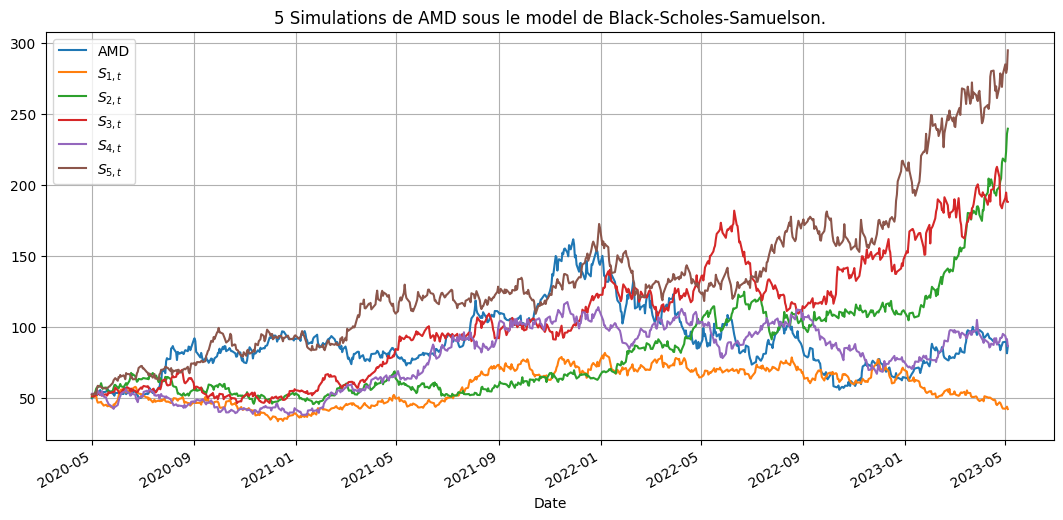

In [181]:
np.random.seed(0)
Nsim = 5

B_t=np.random.normal(scale=dt, size=(t_,Nsim)).cumsum(axis=0)
t=np.ones((t_,Nsim)).cumsum(axis=0)

BSS = S[0]*(np.exp((mu-sigma**2/2)*t + sigma*B_t))


plt.figure(figsize=(13, 6))
S.plot()
plt.title(f"{Nsim} Simulations de {sTicker} sous le model de Black-Scholes-Samuelson.")
plt.plot(S.index,BSS)
plt.legend([S.name,*["$S_{"+f"{i},t"+"}$" for i in range(1,t_+1) ]])
plt.grid(True)
plt.show()



# Les produits dérivés



Les produits dérivés sont des instruments financiers dont la valeur dépend du prix d'un actif sous-jacent. Ils sont utilisés pour se positionner et spéculer sur différents marchés, tels que les actions, les devises, les taux d'intérêt, les matières premières, etc.

Les produits dérivés se déclinent en plusieurs types, notamment les contrats à terme (futures contracts), les options, les swaps et les contrats d'échange (forwards contracts). Chacun de ces instruments a ses propres caractéristiques et fonctionnalités uniques, offrant ainsi aux investisseurs une flexibilité dans leurs stratégies d'investissement. Dans ce projet, nous nous concentrerons sur les options, plus précisément sur l'évaluation des options (Option Pricing).



## Les options européennes


Les options européennes sont des contrats dans lesquels l'acheteur, moyennant le paiement d'une prime, a le droit (mais pas l'obligation) d'acheter ou de vendre un actif sous-jacent à un prix convenu dans le contrat à une date d'échéance spécifiée. L'option d'achat standard, également connue sous le nom d'option "Call", est le prototype des options les plus couramment utilisées et servira de base pour le développement des chapitres suivants sur la gestion des risques.

Prenons l'exemple d'une entreprise qui cherche à se protéger contre la hausse du taux de change entre le dollar et l'euro. Supposons que $S_t$ représente la valeur du taux de change à la date $t$, où $1\$=S_t€$. En détenant une option d'achat (Call), l'entreprise aura le droit d'acheter$ $1\$$ au prix d'exercice $K€$ à une échéance future fixée, notée $T$. À l'échéance, deux scénarios se présentent :

1. Si $1\$$ vaut moins de $K€$, il est plus avantageux pour l'entreprise d'acheter directement $1\$$ sur le marché des changes plutôt que d'exercer son droit. Dans ce cas, le contrat optionnel ne confère aucun gain à l'entreprise.
2. En revanche, si $S_T > K$, il est préférable d'exercer le droit d'achat de $1\$$ au prix de $K€$, ce qui équivaut à recevoir un flux financier de $S_T - K€$ (différence entre le taux de change réel et le prix garanti).

Ainsi, pour l'entreprise détenant l'option Call, le montant reçu à l'échéance $T$ est égal à $\max(0, S_T - K) := (S_T - K)^+€$. Dans le cas d'une option de vente $Put$ donnant le droit de vendre, l'équivalent monétaire pour le détenteur du Put est $\max(K - S_T, 0) := (K - S_T)^+€$.

En d'autres termes, une option agit comme une assurance contre les mouvements défavorables du prix de l'actif sous-jacent. Cette assurance a un coût, appelé prime, que l'entreprise verse initialement au vendeur de l'option à la date $t_0$.

Il est important de souligner qu'il existe une asymétrie des risques entre l'acheteur et le vendeur d'options. L'acheteur ne peut rien perdre à l'échéance, tandis que le vendeur peut être confronté à une augmentation (ou diminution) défavorable des prix dans le cas d'un Call (ou Put).

Dans notre modèle, $C$ (Le prix payé pour l'option d'achat) est une variable aléatoire définie sur un espace de probabilité $(Ω, \mathcal{F}, \mathbb{P})$ qui supporte un mouvement brownien $B$, équipé de sa filtration naturelle $(\mathcal{F}^B_t )_{t∈[0,T]}$, et nous pouvons supposer en plus que $\mathcal{F}^B_T = \mathcal{F}$. La filtration nature de $B$ coïncide avec la filtration générée par le processus d'Itô $S = (S_t)_{t∈[0,T]}$ décrit précédemment.

Nous appelons $S$ le titre sous-jacent - avec $S$ tel que défini ci-dessus, $(\mathcal{F}^S_t )_{t∈[0,T]}$ est simplement la filtration naturelle de $B$. Cette propriété de mesurabilité est le seul lien entre $C$ et le sous-jacent. Si $C = c(S(T))$ pour une fonction borélienne $c$, le dérivé de sécurité est indépendant du chemin et il satisfait bien sûr la condition de mesurabilité. Un dérivé de sécurité familier indépendant du chemin est l'option d'achat européenne avec un prix d'exercice $K$, où $c(x) = (x - K)= \max{(0, x - K)}$, de sorte que le paiement de l'option à l'échéance est $C = (S_T - K)^+$.


# Pricing d'Option



Dans le cadre de ce projet, nous nous concentrerons sur l'évaluation des options européennes en utilisant le modèle le plus couramment utilisé pour évaluer ces options, le modèle de Black-Scholes et Merton jump diffusion.



Les modèles d'évaluation des options sont des modèles mathématiques qui utilisent certaines variables pour calculer la valeur théorique d'une option. La valeur théorique d'une option est une estimation de ce que devrait valoir une option en utilisant toutes les données connues. En d'autres termes, les modèles d'évaluation des options nous fournissent une valeur équitable pour une option. En connaissant cette estimation de la valeur équitable d'une option, les professionnels de la finance peuvent ajuster leurs stratégies de trading et leurs portefeuilles. Par conséquent, les modèles d'évaluation des options sont des outils puissants pour les professionnels de la finance impliqués dans le trading d'options.


## Prix D'option dans le modèle de Black-Scholes
Le modèle de Black-Scholes repose sur plusieurs hypothèses, notamment :

>1. Le taux d'intérêt sans risque est constant et connu.
>1. Les rendements du titre sous-jacent suivent un mouvement brownien géométrique. ($S_t = S_0 \cdot e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma B_t}, \forall t \in [0,T]$)
>1. Il n'y a pas de coûts de transaction ni de restrictions sur la vente à découvert.
>1. Les marchés sont efficients et il n'y a pas d'opportunités d'arbitrage.
>1. Il n'y a pas de dividendes versés sur le titre sous-jacent.


<!-- 
En utilisant ces hypothèses, le modèle de Black-Scholes fournit une formule mathématique pour calculer la valeur théorique d'une option européenne. Cette formule prend en compte plusieurs variables, dont le prix actuel du titre sous-jacent, le prix d'exercice de l'option, le temps restant jusqu'à l'échéance, la volatilité du titre, le taux d'intérêt sans risque, etc.

Une fois que nous avons estimé la valeur équitable de l'option à l'aide du modèle de Black-Scholes, nous pouvons comparer cette valeur avec le prix du marché pour déterminer si l'option est surévaluée ou sous-évaluée. Cela peut aider les traders à prendre des décisions éclairées sur l'achat, la vente ou la stratégie de couverture des options.

Il convient de noter que le modèle de Black-Scholes présente certaines limitations et hypothèses simplificatrices. Dans la réalité, les marchés peuvent ne pas être efficients, la volatilité peut varier, il peut y avoir des coûts de transaction, etc. Par conséquent, il est important de prendre ces facteurs en compte et d'utiliser le modèle de Black-Scholes comme un outil indicatif plutôt que comme une mesure absolue de la valeur d'une option.

En résumé, l'évaluation des options européennes est un domaine important de la finance qui repose sur des modèles mathématiques tels que le modèle de Black-Scholes. Ces modèles aident les professionnels de la finance à estimer la valeur équitable des options et à prendre des décisions éclairées dans le trading d'options. -->

Dans le cadre discret fini, l'hypothèse clé était l'absence d'arbitrage. Cette hypothèse économique a été formulée mathématiquement par le premier théorème fondamental de la tarification des actifs, qui a montré que le principe de non-arbitrage était équivalent à l'existence d'une mesure $\mathbb{Q}$, ayant les mêmes ensembles nuls que $\mathbb{P}$, sous laquelle le processus de prix actualisé est une martingale. Ce résultat, combiné au fait que la transformation (ou "intégrale stochastique discrète") d'une martingale est à nouveau une martingale, nous a permis d'identifier le processus de valeur d'un dérivé européen indépendant du chemin avec celui d'une stratégie de trading "réplicative" impliquant uniquement des actions et le compte du marché monétaire.

Dans les modèles en temps continu, l'analogue du premier théorème fondamental est assez sophistiqué. Pour nos besoins actuels, nous énonçons des d'autre hypothèses qui suffisent à expliquer l'approche de tarification qui nous permettra de dériver la formule de Black-Scholes et d'autres résultats associés. Cette section vise simplement à donner un aperçu des arguments qui seront déployés.



### Hypothèses:
#### **Hypothèse 1**
>Il existe une paire $(x, y)$ de processus, adaptés à la filtration $(\mathcal{F}^S_t )_{t∈[0,T]}$, produisant des portefeuilles composés de positions dans l'action et le compte du marché monétaire, avec des valeurs
>$$
>V_t = x_tS_t + y_tA_t
>$$
>supposées correspondre au paiement de l'option à l'échéance
>$$
>V_t = C,
>$$
>et donc $(x, y)$ est appelée une stratégie de réplication.

En plus de correspondre à l'échéance, nous supposons que l'ensemble du processus des prix des options $C_t$ est indiscernable du processus de valeur de la stratégie $V_t$.

#### **Hypothèse 2**
>Il existe une stratégie de réplication satisfaisant la condition d'autofinancement :
>$$
>dV_t = x_tdS_t + y_tdA_t.
>$$

Dans le modèle binomial, la construction d'une probabilité sans risque était simple, mais en temps continu, elle est beaucoup plus complexe et pour l'instant, nous l'imposons comme suit.

#### **Hypothèse 3**
>
>Il existe une probabilité $\mathbb{Q}$, ayant les mêmes ensembles nuls que $\mathbb{P}$, telle que $\tilde{S}_t = e^{-rt}S_t$ et $\tilde{V}_t = e^{-rt}V_t$ soient des martingales par rapport à $\mathbb{Q}$ et à la filtration $(\mathcal{F}^S_t )_{t∈[0,T]}$.
>
>Une martingale a une espérance constante, donc en particulier $V_0 = \mathbb{E}_\mathbb{Q}[\tilde{V}_t]$. Par conséquent,
>$$
>V_0 = \mathbb{E}_\mathbb{Q}[e^{-rT}C],
>$$

ce qui doit être $C_0$, le prix initial du dérivé avec un paiement $C$, car dans le cas d'une inégalité, une opportunité d'arbitrage apparaît : acheter l'actif bon marché et vendre celui cher, investir le profit sans risque, de sorte qu'un profit sans risque soit maintenu à l'échéance, grâce à la réplication, avec une certaine prudence nécessaire pour respecter certaines conditions d'admissibilité.

L'esprit de la prochaine condition est qu'il existe une formule en forme fermée pour le prix de l'option, bien que nous ne connaissions pas encore sa forme. Une caractéristique supplémentaire est que le prix ne dépend pas de l'historique des prix des actions. Cela s'applique uniquement aux dérivés indépendants du chemin.

### **Dérivation de l'équation aux dérivées partielles de Black-Scholes**
Le processus $C_t$ est de la forme 

$$
C_t = F(t, S_t),
$$

où la fonction déterministe $F$ possède une première dérivée continue par rapport à $t ∈ [0, T]$ et des premières et secondes dérivées continues par rapport à $s ∈ \mathbb{R}$.
$$F \in C^{1,2}([0, T] \times \mathbb{R}) $$

En appliquant la **formule d'Ito**, nous trouvons que le processus $C_t$ est un processus d'Ito et a la différentielle stochastique suivante :

\begin{align}
dC_t &= {\partial_t F}(t, S_t) dt + {\partial_z F}(t, S_t) dS_t +\frac{1}{2} {\partial_{ss} F}(t, S_t) <dS_t>_t\\
dC_t &= [{\partial_{t} F}(t, S_t) + \mu S_t {\partial_{s} F}(t, S_t) + \frac{1}{2}\sigma^2 S^2 {\partial_{ss} F}(t, S_t)] dt + \sigma S_t {\partial_{s} F}(t, S_t) dB_t. 
\end{align}

Avec la forme donnée de $dS_t$ et $dA_t$, la condition d'autofinancement s'écrit :
$$ dC_t = (x_t\mu S_t + r y_t A_t) dt + x_t\sigma S_t dB_t $$

Maintenant, en utilisant le fait que la représentation d'un processus d'Ito est unique, les caractéristiques à droite des équations () et () doivent correspondre:

>$$[{\partial_{t} F}(t, S_t) + \mu S_t {\partial_{s} F}(t, S_t) + \frac{1}{2}\sigma^2 S^2 {\partial_{ss} F}(t, S_t)]  = (x_t\mu S_t + r y_t A_t),$$
>$$ \sigma S_t {\partial_{s} F}(t, S_t)=  x_t\sigma S_t $$


La deuxième ligne donne immédiatement

$$ x_t = {\partial_{s} F}(t, S_t), $$

ce qui, inséré dans la première ligne, donne

$$ {\partial_{t} F}(t, S_t) + \frac{1}{2}\sigma^2 S^2_t{\partial_{ss} F}(t, S_t) = ry_tA_t, $$

fournissant une formule pour la deuxième composante de la stratégie de réplication :

$$ y_t = \frac{1}{rA_t} \left( {\partial_{t} F}(t, S_t) + \frac{1}{2}\sigma^2 S^2_t{\partial_{ss} F}(t, S_t) \right). $$

La condition de réplication $C_t = x_tS_t + y_tA_t$, avec les expressions ci-dessus pour $x$ et $y$, donne

$$ F(t, S_t) = {\partial_{s} F}(t, S_t)S_t + \frac{1}{r} \left( {\partial_{t} F}(t, S_t) + \frac{1}{2}\sigma^2 S^2_t{\partial_{ss} F}(t, S_t) \right), $$

puisque $C_t = F(t, S_t)$ selon notre hypothèse. Après avoir remplacé $S_t$ par une variable générale $s$, cette équation peut être réorganisée en

>$$ {\partial_{t} F}(t,s) + \frac{1}{2}\sigma^2 s^2 {\partial_{ss} F}(t,s) + rs {\partial_{s} F}(t,s) - rF(t,s)=0 \quad \text{pour} \quad 0 < t < T, \quad s \in \mathbb{R}. $$

Il est clair qu'au temps $T$, la valeur $C_t$ doit correspondre au paiement de l'option, donc nous imposons la condition terminale

$$ F(T,s) = c(s) \quad \text{pour} \quad s \in \mathbb{R}. $$

L'équation aux dérivées partielles (EDP) ci-dessus est connue sous le nom **d'équation aux dérivées partielles de Black-Scholes**. En la résolvant, nous obtiendrons la fonction **$F$**, ce qui permettra de résoudre le problème de tarification avec succès.

### Résoudre d'équation de Black-Scholes

Soit $C$ la variable aleatoire qui represent le prix d'un option 'Call' :

$$ {\partial_{t} C}(t,s) + \frac{1}{2}\sigma^2 s^2 {\partial_{ss} C}(t,s) + rs {\partial_{s} C}(t,s) - rC(t,s)=0 \quad \text{pour} \quad 0 < t < T, \quad s \in \mathbb{R}. $$

Pour résoudre cette équation aux dérivées partielles, nous reconnaissons qu'il s'agit d'une équation de Cauchy-Euler qui peut être transformée en une équation de diffusion en introduisant une transformation de changement de variable.

\begin{aligned}
\tau &= T-t\\
u &= Ce^{r\tau}\\
x &= \ln \left(\frac{S}{K}\right) + \left(r - \frac{1}{2}\sigma^2\right)\tau
\end{aligned}


Ensuite, l'équation de Black-Scholes devient une équation de diffusion :

$$\frac{\partial u}{\partial \tau} = \frac{1}{2}\sigma^2\frac{\partial^2 u}{\partial x^2}$$

La condition terminale $C(S, T) = \max\{S-K, 0\}$ devient maintenant une condition initiale :

$$u(x, 0) = u_0(x) := K\left(e^x - 1\right)H(x)$$

où $H(x)$ est la fonction de Heaviside. La fonction de Heaviside correspond à l'imposition des données aux limites dans le système de coordonnées $S$, $t$ qui exige que lorsque $t = T$, $C(S, T) = 0$ pour tout $S < K$, en supposant que $S$ et $K$ sont tous deux supérieurs à 0. Avec cette hypothèse, elle est équivalente à la fonction maximum sur tous les $x$ dans les nombres réels, à l'exception de $x = 0$. L'égalité entre la fonction maximum et la fonction de Heaviside est entendue au sens des distributions car elle ne tient pas pour $x = 0$. Bien que subtile, cela est important car la fonction de Heaviside n'est pas nécessairement finie en $x = 0$, voire même définie pour cela. Pour en savoir plus sur la valeur de la fonction de Heaviside en $x = 0$, voir la section "Argument nul" de l'article sur la fonction échelon de Heaviside.

En utilisant la méthode classique de convolution pour résoudre une équation de diffusion avec une fonction de valeur initiale donnée $u(x, 0)$, nous avons :

$$u(x, \tau) = \frac{1}{\sigma\sqrt{2\pi\tau}} \int_{-\infty}^{\infty} u_0(y) \exp\left[-\frac{(x-y)^2}{2\sigma^2\tau}\right]dy$$

Après quelques manipulations, cela donne :

$$u(x, \tau) = Ke^{x+\frac{1}{2}\sigma^2\tau}N(d_1) - KN(d_2)$$

où 

$N(\cdot)$ est la fonction de répartition normale standard et

\begin{aligned}

d_{1}&={\frac {1}{\sigma {\sqrt {\tau }}}}\left[\left(x+{\frac {1}{2}}\sigma ^{2}\tau \right)+{\frac {1}{2}}\sigma ^{2}\tau \right]\\d_{2}&={\frac {1}{\sigma {\sqrt {\tau }}}}\left[\left(x+{\frac {1}{2}}\sigma ^{2}\tau \right)-{\frac {1}{2}}\sigma ^{2}\tau \right].

\end{aligned}
These are the same solutions (up to time translation) that were obtained by Fischer Black in 1976.[3](https://www.sciencedirect.com/science/article/abs/pii/0304405X76900246?via%3Dihub)

En revenant aux variables d'origine, suivant la même démarche pour les Puts, nous obtenons la solution précédemment mentionnée à l'équation de Black-Scholes.


>#### Les formule de Black-Scholes:
>Les formules pour le prix des options d'achat (call) et de vente (put) européennes sont les suivantes :
>
>Pour l'option d'achat (call) :
>$$ C(t,S_t) = S_tN(d_{1}) - Ke^{-r(T-t)}N(d_{2}) $$
>
>Pour l'option de vente (put) :
>$$ P(t,S_t)= -S_tN(-d_{1}) + Ke^{-r(T-t)}N(-d_{2}) $$
>
>où :
>- $S_t$ est le prix de l'actif sous-jacent à l'instant t,
>- $K$ est le prix d'exercice de l'option,
>- $r$ est le taux d'intérêt sans risque,
>- $T$ est la date d'échéance de l'option,
>- $N(\cdot)$ représente la fonction de distribution normale standard,
>- $d_{1}={\frac {1}{\sigma {\sqrt {(T-t) }}}}\left[\left(x+{\frac {1}{2}}\sigma ^{2}(T-t) \right)+{\frac {1}{2}}\sigma ^{2}(T-t) \right]$
>- $d_{2}={\frac {1}{\sigma {\sqrt {(T-t) }}}}\left[\left(x+{\frac {1}{2}}\sigma ^{2}(T-t) \right)-{\frac {1}{2}}\sigma ^{2}(T-t) \right]$.
>

### Prix d'option a $t_0$:

>Pour l'option d'achat (call) :
>$$ C(r, T, K, S_0, σ) = S_0N(d_{1}) - Ke^{-rT}N(d_{2}) $$
>
>Pour l'option de vente (put) :
>$$ P(r, T, K, S_0, σ)= -S_0N(-d_{1}) + Ke^{-rT}N(-d_{2}) $$
>
>où :
>- $S_0$ est le prix de l'actif sous-jacent à l'instant 0,
>- $K$ est le prix d'exercice de l'option,
>- $r$ est le taux d'intérêt sans risque,
>- $T$ est la date d'échéance de l'option,
>- $N(\cdot)$ représente la fonction de distribution normale standard,
>- $d_{1}={\frac {1}{\sigma {\sqrt {T }}}}\left[\left(x+{\frac {1}{2}}\sigma ^{2}T \right)+{\frac {1}{2}}\sigma ^{2}T \right]$
>- $d_{2}={\frac {1}{\sigma {\sqrt {T }}}}\left[\left(x+{\frac {1}{2}}\sigma ^{2}T \right)-{\frac {1}{2}}\sigma ^{2}T \right]$.
>

### Implementation in Python 

In [182]:
def OptionPrice(*,Type,S_0,K,r,sigma,tau):
    d_1 = (np.log(S_0/K) + (r + sigma**2/2)*tau)/(sigma*np.sqrt(tau))
    d_2 = d_1 - sigma*np.sqrt(tau)
    if Type.lower()=='call':
        analytic_price = S_0*norm.cdf(d_1) - K*np.exp(-r*tau)*norm.cdf(d_2)
    elif Type.lower()=='put':
        analytic_price = -S_0*norm.cdf(-d_1) + K*np.exp(-r*tau)*norm.cdf(-d_2)
    else:
        print('Option type is missing.')
    return analytic_price

In [183]:
r=0.1
K=1
OptionPrice(Type='call',S_0=S[0],K=K,r=r,sigma=sigma,tau=t_)

49.880001068115234

In [196]:
# store maturities
lMaturity = list(stock.options)
# get current date
today = datetime.now().date()
# empty list for days to expiration
lDTE = []
# empty list to store data for calls
lData_calls = []
# loop over maturities
for maturity in lMaturity:
    # maturity date
    maturity_date = datetime.strptime(maturity, '%Y-%m-%d').date()
    # DTE: difference between maturity date and today
    lDTE.append((maturity_date - today).days)
    # store call data
    lData_calls.append(stock.option_chain(maturity).calls)
    
    
# create empty lists to contain unlisted data
lStrike = []
lDTE_extended = []

for i in range(len(lData_calls)):
    # append strikes to list
    lStrike.append(lData_calls[i]["strike"])
    # repeat DTE so the list has same length as the other lists
    lDTE_extended.append(np.repeat(lDTE[i], len(lData_calls[i])))
    # append implied volatilities to list
    
# unlist list of lists
lStrike = list(chain(*lStrike))
lDTE_extended = list(chain(*lDTE_extended))

## Monte Carlo

### Definition

La méthode de Monte-Carlo (du nom des casinos, pas d'une personne) est une approche probabiliste permettant d'approximer la valeur d'une intégrale. L'idée de base est que l'intégrale $G$ peut être vue comme l'espérance d'une variable aléatoire uniforme $X$ sur l'intervalle $[a,b]$:

$$
{
     
    G=\mathbb {E} (g(X))=\int_a^b g(x) dx
}
$$

### Example

In [ ]:
N=10000000
print(f"Approximation de π par Monte Carlo pour un échantillon de {N}: {MonteCarlo(f,N)[0]} ± {MonteCarlo(f,N)[1]:.3}")


Il faut aussi quantifier la précision de cette estimation, via la variance de $\bar {g}_{N}$ qui s'exprime à l'aide de la variance de ${ g(X)}$.
$$
{
    \sigma _{g}^{2}:=\sigma _{g(X)}^{2}=\mathbb {E} ([g(X)-\mathbb {E} (g(X))]^{2})=\mathbb {E} (g^{2}(X))-\mathbb {E} ^{2}(g(X))=\int g^{2}(x)f_{X}(x)\,{d}x-G^{2}
}
$$
Si l'échantillon est supposé iid, cette dernière est estimée à l'aide de sa variance empirique
$$
{ S_{g(X)}^{2}={\frac {1}{N}}\sum _{i=1}^{N}(g(x_{i})-{\bar {g}}_{N})^{2}={\frac {1}{N}}\sum _{i=1}^{N}g^{2}(x_{i})-{\bar {g}}_{N}^{2}\simeq \sigma _{g}^{2}}
$$